# Introduction:

This Jupyter Notebook explores a dataset containing information about Airbnb listings in Cape Town. The dataset comprises various attributes such as listing ID, host details, geographical coordinates, room type, pricing, availability, and review-related metrics. With over 22,000 entries and 18 columns, the dataset offers a comprehensive overview of the Airbnb market in Cape Town.

In this project, we aim to analyze and understand the dynamics of the Airbnb market in Cape Town. By leveraging the power of Python and the Pandas library, we will delve into the dataset to uncover insights, trends, and patterns that can provide valuable information for both hosts and guests alike.

Our analysis will cover a wide range of aspects, including pricing trends, popularity of room types, host behaviors, geographical distribution of listings, and more. Through exploratory data analysis (EDA), visualization, and statistical techniques, we will gain deeper insights into the Airbnb ecosystem in the area.

Ultimately, this project seeks to offer actionable insights and recommendations for various stakeholders, including Airbnb hosts, prospective guests, and policymakers, to make informed decisions and enhance their experiences within the Airbnb community.

In [1]:
import numpy as np     
import pandas as pd      
import matplotlib.pyplot as plt   
import seaborn as sns 
import plotly.express as px

import re

# Statistical analysis
import scipy.stats as stats

# Jupyter Notebook magic commands for inline plotting
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
df = pd.read_csv('data/raw/listings.csv')

### Understanding the data

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,3191,Home in Southern Suburbs · ★4.81 · 1 bedroom ·...,3754,Brigitte,NaN,Ward 57,-33.947620,18.475990,Entire home/apt,650.0,3,75,2023-12-23,0.58,1,306,6,NaN
1,15007,Home in Cape Town · ★4.82 · 3 bedrooms · 4 bed...,59072,Dirk,NaN,Ward 23,-33.800010,18.460630,Entire home/apt,4029.0,2,45,2023-12-03,0.37,3,294,6,NaN
2,15068,Rental unit in Cape Town · 3 bedrooms · 5 beds...,59318,Linda,NaN,Ward 23,-33.788260,18.459400,Entire home/apt,2000.0,4,0,NaN,NaN,4,354,0,NaN
3,15077,Rental unit in Tableview - Sunset Beach · ★5.0...,59342,Georg,NaN,Ward 4,-33.858356,18.490376,Private room,2377.0,2,7,2022-06-16,0.05,6,83,0,NaN
4,15199,Rental unit in Cape Town · 1 bedroom · 1 bed ·...,59694,Alexa,NaN,Ward 115,-33.911150,18.412350,Entire home/apt,2500.0,14,2,2016-04-15,0.02,1,365,0,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22966 entries, 0 to 22965
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              22966 non-null  int64  
 1   name                            22966 non-null  object 
 2   host_id                         22966 non-null  int64  
 3   host_name                       22962 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   22966 non-null  object 
 6   latitude                        22966 non-null  float64
 7   longitude                       22966 non-null  float64
 8   room_type                       22966 non-null  object 
 9   price                           21574 non-null  float64
 10  minimum_nights                  22966 non-null  int64  
 11  number_of_reviews               22966 non-null  int64  
 12  last_review                     

In [5]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

## 1. Data Preprocessing 

### 1.1 Preprocessing: Name Column

The first part of the preprocessing will involve the `name` column. We will split the data into five columns, namely:

- `property type`
- `rating`
- `bedrooms`
- `beds`
- `baths`


In [6]:
# create property info dataframe

df_prop_inf = pd.DataFrame()

In [7]:
# split name column into five columns

df_prop_inf[['property_type', 'rating', 'no._of_bedrooms', 'no._of_beds', 'no._of_baths']] = df['name'].str.split(' · ', expand=True)
df_prop_inf.head()

,property_type,rating,no._of_bedrooms,no._of_beds,no._of_baths
0,Home in Southern Suburbs,★4.81,1 bedroom,1 bed,1 bath
1,Home in Cape Town,★4.82,3 bedrooms,4 beds,3 baths
2,Rental unit in Cape Town,3 bedrooms,5 beds,2 baths,None
3,Rental unit in Tableview - Sunset Beach,★5.0,1 bedroom,2 beds,1.5 baths
4,Rental unit in Cape Town,1 bedroom,1 bed,1 bath,None


### Work on Property Type column:

In [8]:
# check if property type column only contains property type data 

percentage_with_in = (df_prop_inf['property_type'].str.contains('in').sum() / len(df_prop_inf)) * 100
print("Percentage of rows with 'in' in the 'property type' column:", percentage_with_in)

Percentage of rows with 'in' in the 'property type' column: 100.0


In [9]:
# isolate property type column for further cleaning by splitting the property type and area

df_prop_inf_clean = df_prop_inf['property_type'].str.split(' in ', expand=True)
df_prop_inf_clean.head(2)

,0,1,2
0,Home,Southern Suburbs,None
1,Home,Cape Town,None


In [10]:
# check which row does not have null value because the 3rd column should not exist
df_prop_inf_clean[df_prop_inf_clean.notna().all(axis=1)]

,0,1,2
1920,Rental unit,Simon's Town,Cape Town


In [11]:
# change all 3rd column values to None

df_prop_inf_clean.loc[df_prop_inf_clean[2].notna(), 2] = None
print(df_prop_inf_clean[2].value_counts())

Series([], Name: count, dtype: int64)


In [12]:
# drop third column

df_prop_inf_clean = df_prop_inf_clean.drop(columns=[2])

In [13]:
# change 2nd column values to 'Cape Town'

df_prop_inf_clean[1] = 'Cape Town'

In [14]:
# change column names

df_prop_inf_clean.columns = ['property_type', 'city']
df_prop_inf_clean.head(2)

,property_type,city
0,Home,Cape Town
1,Home,Cape Town


In [15]:
# remove the first column from df

df_prop_inf = df_prop_inf.iloc[:, 1:]

In [16]:
# add clean property type and city columns to property info df

df_prop_inf['property_type'] = df_prop_inf_clean['property_type']
df_prop_inf['city'] = df_prop_inf_clean['city']

df_prop_inf.head(2)

,rating,no._of_bedrooms,no._of_beds,no._of_baths,property_type,city
0,★4.81,1 bedroom,1 bed,1 bath,Home,Cape Town
1,★4.82,3 bedrooms,4 beds,3 baths,Home,Cape Town


In [17]:
df[['property_type', 'city']] = df_prop_inf[['property_type', 'city']]

In [18]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license', 'property_type',
       'city'],
      dtype='object')


The `property type` and `city` columns have been cleaned and added to the original DataFrame.

### Work on ratings column

In [19]:
# create ratings dataframe

df_ratings = pd.DataFrame()

In [20]:
# populate with ratings column from original dataframe

df_ratings = df_prop_inf['rating'].copy()
df_ratings.head(3)

0         ★4.81
1         ★4.82
2    3 bedrooms
Name: rating, dtype: object

In [21]:
#if the value does not contain a star, change it to No Rating

df_ratings[df_ratings.str.contains('★') == False ] = 'No rating'
value_counts = df_ratings.value_counts()
no_rating_count = value_counts.get('No rating', 0)
print("Number of 'No rating' values:", no_rating_count)

Number of 'No rating' values: 7288


In [22]:
# if value contains the string New, change it to No Rating

df_ratings[df_ratings.str.contains('New') == True ] = 'No rating'
value_counts = df_ratings.value_counts()
no_rating_count = value_counts.get('No rating', 0)
print("Number of 'No rating' values:", no_rating_count)

Number of 'No rating' values: 9339


In [23]:
# remove the star

df_ratings.loc[df_ratings.str.contains('.')] = df_ratings.str.replace('★', '')
df_ratings.head()

0         4.81
1         4.82
2    No rating
3          5.0
4    No rating
Name: rating, dtype: object

In [24]:
# replace No rating with NaN

df_ratings.replace('No rating', np.nan, inplace=True)
df_ratings.head()

0    4.81
1    4.82
2     NaN
3     5.0
4     NaN
Name: rating, dtype: object

In [25]:
# change series to float values

df_ratings = df_ratings.astype(float)
df_ratings.info()

<class 'pandas.core.series.Series'>
RangeIndex: 22966 entries, 0 to 22965
Series name: rating
Non-Null Count  Dtype  
--------------  -----  
13627 non-null  float64
dtypes: float64(1)
memory usage: 179.6 KB


In [26]:
# create rating column

df['rating'] = df_ratings


The `rating` column has been cleaned and added to the original DataFrame.

### Work on the bedroom column

In [27]:
# create bedrooms dataframe

df_bedrooms = pd.DataFrame()

In [28]:
# create copy of dataframe

df_bedrooms = df_prop_inf[['rating', 'no._of_bedrooms']].copy()
df_bedrooms.head()

,rating,no._of_bedrooms
0,★4.81,1 bedroom
1,★4.82,3 bedrooms
2,3 bedrooms,5 beds
3,★5.0,1 bedroom
4,1 bedroom,1 bed


In [29]:
# define a custom function to assign values to the 'bedrooms' column based on the 'rating' column

def assign_bedrooms(row):
    if 'bedroom' in row['rating']:
        return row['rating']
    else:
        return row['no._of_bedrooms']

# apply the custom function to each row of the DataFrame

df_bedrooms['no._of_bedrooms'] = df_bedrooms.apply(assign_bedrooms, axis=1)

In [30]:
# extract integers from the 'bedrooms' column and convert to float

df_bedrooms['no._of_bedrooms'] = df_bedrooms['no._of_bedrooms'].str.extract(r'(\d+)').astype(float)
df_bedrooms['no._of_bedrooms']

0        1.0
1        3.0
2        3.0
3        1.0
4        1.0
        ... 
22961    2.0
22962    1.0
22963    1.0
22964    1.0
22965    1.0
Name: no._of_bedrooms, Length: 22966, dtype: float64

In [31]:
# create rating column in original dateframe

df['no._of_bedrooms'] = df_bedrooms['no._of_bedrooms']


The `bedrooms` column has been cleaned and added to the original DataFrame.

### Working on beds column

In [32]:
# create beds dataframe

df_beds = pd.DataFrame()

In [33]:
# use bedroom and beds columns

df_bed = df_prop_inf[['no._of_bedrooms', 'no._of_beds']].copy()
df_bed.head()

,no._of_bedrooms,no._of_beds
0,1 bedroom,1 bed
1,3 bedrooms,4 beds
2,5 beds,2 baths
3,1 bedroom,2 beds
4,1 bed,1 bath


In [34]:
pattern = r'\b\d+\s+(?!bedrooms?\b)(?:beds?)\b'

# define a function to update the 'beds' column based on the pattern
def update_column(row):
    bedrooms_value = row['no._of_bedrooms']
    if bedrooms_value is None:
        return row['no._of_beds']
    elif re.findall(pattern, bedrooms_value):
        return bedrooms_value
    else:
        return row['no._of_beds']

# apply the update_column function to each row of the DataFrame 'df_bed'
df_bed['no._of_beds'] = df_bed.apply(update_column, axis=1)


In [35]:
total_bedroom_occurrences = df_bed['no._of_beds'].str.contains('no._of_beds').sum()
print("Total occurrences of 'bedroom' in 'beds' column:", total_bedroom_occurrences)

Total occurrences of 'bedroom' in 'beds' column: 0


In [36]:
df_bed.columns

Index(['no._of_bedrooms', 'no._of_beds'], dtype='object')

In [37]:
# extract integers from the 'beds' column and convert to float

df_bed['no._of_beds'] = df_bed['no._of_beds'].str.extract(r'(\d+)').astype(float)
df_bed['no._of_beds']

0         1.0
1         4.0
2         5.0
3         2.0
4         1.0
         ... 
22961     2.0
22962     1.0
22963     1.0
22964    19.0
22965     1.0
Name: no._of_beds, Length: 22966, dtype: float64

In [38]:

#create beds column in original dataframe

df['no._of_beds'] = df_bed['no._of_beds']


The `beds` column has been cleaned and added to the original DataFrame.

### Work on baths column

In [39]:
# create empty dataframe
df_baths = pd.DataFrame()

In [40]:
#use beds and bath columns and check dataframe

df_baths = df_prop_inf[['no._of_beds', 'no._of_baths']].copy()
df_baths.head()

,no._of_beds,no._of_baths
0,1 bed,1 bath
1,4 beds,3 baths
2,2 baths,None
3,2 beds,1.5 baths
4,1 bath,None


In [41]:
# define a function to update the 'baths' column based on the string values

def assign_baths(row):
    beds_value = row['no._of_beds']
    if beds_value is not None and 'bath' in beds_value:
        return beds_value
    else:
        return row['no._of_baths']

# apply the custom function to each row of the DataFrame
df_baths['no._of_baths'] = df_baths.apply(assign_baths, axis=1)


In [42]:
# calculate the total number of rows in the DataFrame
total_rows = len(df_baths)

# calculate the total occurrences of 'bath' and without 'bath' in the 'baths' column
total_baths_occurrences = df_baths['no._of_baths'].str.contains('bath').sum()
total_occurrences_without_bath = total_rows - total_baths_occurrences

# calculate the percentage of occurrences of 'bath' out of all the rows
percentage_baths_occurrences = (total_baths_occurrences / total_rows) * 100

# print the results
print("Total occurrences of 'bath' in 'baths' column:", total_baths_occurrences)
print("Percentage of occurrences of 'bath' out of all the rows:", percentage_baths_occurrences)
print("Total occurrences without 'bath' in 'baths' column:", total_occurrences_without_bath)


Total occurrences of 'bath' in 'baths' column: 22781
Percentage of occurrences of 'bath' out of all the rows: 99.19446137768875
Total occurrences without 'bath' in 'baths' column: 185


In [43]:
# extract integers from the 'beds' column and convert to float

df_baths['no._of_baths'] = df_baths['no._of_baths'].str.extract(r'(\d+)').astype(float)
df_baths['no._of_baths']

0         1.0
1         3.0
2         2.0
3         1.0
4         1.0
         ... 
22961     1.0
22962     1.0
22963     1.0
22964    15.0
22965     1.0
Name: no._of_baths, Length: 22966, dtype: float64

In [44]:
# create baths column in original data frame

df['no._of_baths'] = df_baths['no._of_baths']
df['no._of_baths'].head()

0    1.0
1    3.0
2    2.0
3    1.0
4    1.0
Name: no._of_baths, dtype: float64


The `baths` column has been cleaned and added to the original DataFrame.

### 1.2 Preprocessing: Missing values

In [45]:
# Count the number of null rows

null_counts = df.isnull().sum()
total_rows = len(df)
null_percentage = (null_counts / total_rows) * 100
null_info = pd.DataFrame({
    'Number of Null Values': null_counts,
    'Percentage of Null Values': null_percentage
})

null_info[null_info['Number of Null Values'] > 0].sort_values(by='Percentage of Null Values', ascending=False)

,Number of Null Values,Percentage of Null Values
neighbourhood_group,22966,100.000000
license,22891,99.673430
rating,9339,40.664461
last_review,5764,25.097971
reviews_per_month,5764,25.097971
price,1392,6.061134
no._of_bedrooms,968,4.214926
no._of_baths,284,1.236611
no._of_beds,153,0.666202
host_name,4,0.017417


### Work on Neighbourhood Group column

In [46]:
# drop column

df.drop(columns=['neighbourhood_group'], inplace=True)

### Work on License column

In [47]:
# drop column

df.drop(columns=['license'], inplace=True)

### Work on Price column

In [48]:
df['price'].value_counts()

price
1500.0     373
1200.0     311
2500.0     294
2000.0     286
3000.0     266
          ... 
7523.0       1
412.0        1
13236.0      1
28750.0      1
805.0        1
Name: count, Length: 4824, dtype: int64

In [49]:
# print the shape of the DataFrame before and after removing rows with null values in the price column

print("Before removing rows with null values in price column there are", df.shape[0], "rows")
df.dropna(subset=['price'], inplace=True)
print("After removing rows with null values in price column there are", df.shape[0], "rows")


Before removing rows with null values in price column there are 22966 rows
After removing rows with null values in price column there are 21574 rows


### Work on bedrooms, baths & beds columns

In [50]:
# Count the number of null rows for bedrooms, baths & beds

null_counts = df.isnull().sum()
total_rows = len(df)
null_percentage = (null_counts / total_rows) * 100
null_info = pd.DataFrame({
    'Number of Null Values': null_counts,
    'Percentage of Null Values': null_percentage
})

null_info[null_info['Number of Null Values'] > 0].sort_values(by='Percentage of Null Values', ascending=False).loc[['no._of_bedrooms', 'no._of_baths', 'no._of_beds']]

,Number of Null Values,Percentage of Null Values
no._of_bedrooms,923,4.278298
no._of_baths,254,1.177343
no._of_beds,130,0.602577


In [51]:
replacement_values = {
    'no._of_bedrooms': 'No bedroom',
    'no._of_baths': 'No bath',
    'no._of_beds': 'No beds'
}

df.fillna(replacement_values, inplace=True)


In [52]:
# Count the number of null rows for bedrooms, baths & beds

null_counts = df.isnull().sum()
total_rows = len(df)
null_percentage = (null_counts / total_rows) * 100
null_info = pd.DataFrame({
    'Number of Null Values': null_counts,
    'Percentage of Null Values': null_percentage
})

null_info[null_info['Number of Null Values'] > 0].sort_values(by='Percentage of Null Values', ascending=False)

,Number of Null Values,Percentage of Null Values
rating,8645,40.071382
last_review,5311,24.617595
reviews_per_month,5311,24.617595
host_name,4,0.018541


In [53]:
df.shape

(21574, 22)

### Work on Host Name column

In [54]:
# print the shape of the DataFrame before and after removing rows with null values in the price column

print("Before removing rows with null values in price column there are", df.shape[0], "rows")
df.dropna(subset=['host_name'], inplace=True)
print("After removing rows with null values in price column there are", df.shape[0], "rows")


Before removing rows with null values in price column there are 21574 rows
After removing rows with null values in price column there are 21570 rows


#### Missing values summary:

- The `neighbourhood_group` and `license` columns were removed completely
- Rows that had missing values in the `price` column were dropped
- Rows that had missing values in either the `price`, `no._of_bedrooms`, `no._of_baths` or `no._of_beds` columns were replaced with 'No bedroom', 'No baths' and 'No beds' respectively

### 1.3 Preprocessing: Duplicate values

In [55]:
# Count the number of duplicated rows
num_duplicates = df.duplicated().sum()
total_rows = len(df)
duplicates_percentage = (num_duplicates / total_rows) * 100
duplicates_info = pd.DataFrame({
    'Number of Duplicated Rows': [num_duplicates],
    'Percentage of Duplicated Rows': [duplicates_percentage]
})

duplicates_info


,Number of Duplicated Rows,Percentage of Duplicated Rows
0,0,0.0


#### Duplicate values summary:

- There are no duplicates within the dataset

### 1.4 Preprocessing: Dropping columns

In [56]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'property_type', 'city', 'rating',
       'no._of_bedrooms', 'no._of_beds', 'no._of_baths'],
      dtype='object')

In [57]:
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,...,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,property_type,city,rating,no._of_bedrooms,no._of_beds,no._of_baths
0,3191,Home in Southern Suburbs · ★4.81 · 1 bedroom ·...,3754,Brigitte,Ward 57,-33.947620,18.475990,Entire home/apt,650.0,3,...,0.58,1,306,6,Home,Cape Town,4.81,1.0,1.0,1.0
1,15007,Home in Cape Town · ★4.82 · 3 bedrooms · 4 bed...,59072,Dirk,Ward 23,-33.800010,18.460630,Entire home/apt,4029.0,2,...,0.37,3,294,6,Home,Cape Town,4.82,3.0,4.0,3.0
2,15068,Rental unit in Cape Town · 3 bedrooms · 5 beds...,59318,Linda,Ward 23,-33.788260,18.459400,Entire home/apt,2000.0,4,...,NaN,4,354,0,Rental unit,Cape Town,NaN,3.0,5.0,2.0
3,15077,Rental unit in Tableview - Sunset Beach · ★5.0...,59342,Georg,Ward 4,-33.858356,18.490376,Private room,2377.0,2,...,0.05,6,83,0,Rental unit,Cape Town,5.00,1.0,2.0,1.0
4,15199,Rental unit in Cape Town · 1 bedroom · 1 bed ·...,59694,Alexa,Ward 115,-33.911150,18.412350,Entire home/apt,2500.0,14,...,0.02,1,365,0,Rental unit,Cape Town,NaN,1.0,1.0,1.0


In [58]:
# drop columns

columns_to_drop = ['id', 'name', 'host_id']
df.drop(columns=columns_to_drop, inplace=True)


### 1.5 Data Preprocessing: Outliers

In [59]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,21570.0,-33.957945,0.100604,-34.262840,-34.019835,-33.928754,-33.910040,-33.57218
longitude,21570.0,18.473844,0.126888,18.320145,18.400963,18.427510,18.482737,18.93603
price,21570.0,4089.744692,9601.959073,160.000000,1050.000000,2000.000000,3816.000000,600850.00000
minimum_nights,21570.0,4.320770,16.874074,1.000000,1.000000,2.000000,3.000000,999.00000
number_of_reviews,21570.0,22.531247,44.182936,0.000000,1.000000,5.000000,24.000000,724.00000
reviews_per_month,16260.0,0.931870,1.077782,0.010000,0.190000,0.570000,1.260000,16.65000
calculated_host_listings_count,21570.0,11.639638,24.790034,1.000000,1.000000,2.000000,7.000000,151.00000
availability_365,21570.0,199.584886,127.126920,0.000000,78.000000,239.000000,314.000000,365.00000
number_of_reviews_ltm,21570.0,6.466110,11.047883,0.000000,0.000000,2.000000,8.000000,216.00000
rating,12927.0,4.772162,0.273646,1.670000,4.670000,4.850000,4.960000,5.00000


### Pricing  Outliers

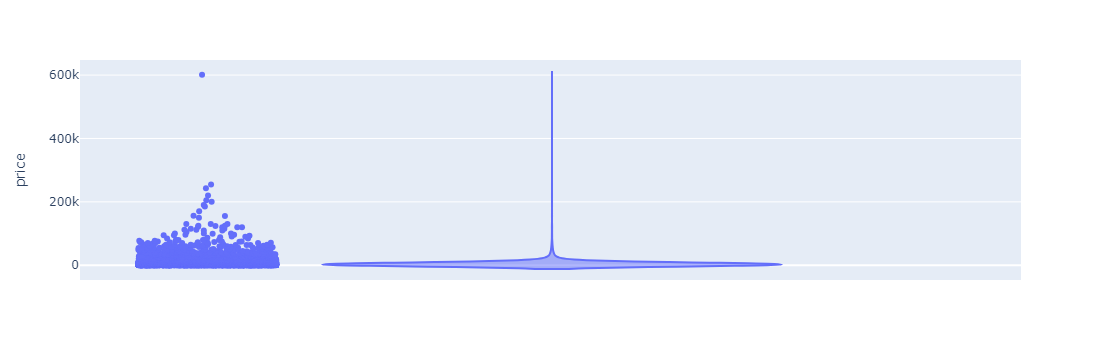

In [67]:
fig = px.violin(df, y="price", points='all')
fig.show()

After conducting research on the Airbnb website and cross-referencing with the latitude and longitude coordinates, it has been determined that the listed price of R600,850.00/night should be corrected to R680.00/night. Consequently, the price will be adjusted manually.

In [69]:
# find the index of the row with the maximum price
max_price_index = df['price'].idxmax()

# update the price value at the found index
df.at[max_price_index, 'price'] = 680.0

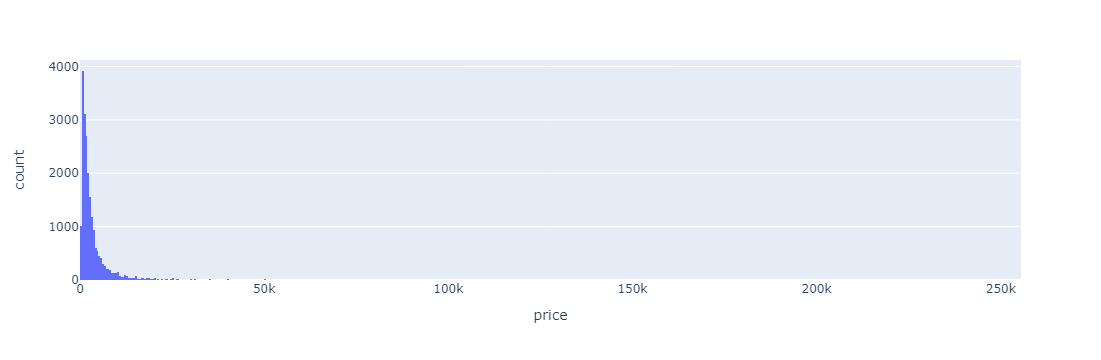

In [70]:
fig = px.histogram(df, x='price')

fig.show()

Verifying prices exceeding R200,000.00/night:

In [75]:
# Count values with prices greater than 200000
count_greater_than_200000 = (df['price'] > 200000).sum()

print("Number of values with prices greater than 200000:", count_greater_than_200000)
print("Note: All prices exceeding R200k were manually verified and found to be valid.")

Number of values with prices greater than 200000: 4
Note: All prices exceeding R200k were manually verified and found to be valid.


In [62]:
df.describe(include=[object]).T

,count,unique,top,freq
host_name,21570,4744,Propr,490
neighbourhood,21570,92,Ward 115,4400
room_type,21570,4,Entire home/apt,17396
last_review,16260,1387,2023-12-17,406
property_type,21570,41,Rental unit,8950
city,21570,1,Cape Town,21570
no._of_bedrooms,21570.0,23.0,1.0,9981.0
no._of_beds,21570.0,29.0,1.0,9357.0
no._of_baths,21570.0,21.0,1.0,12953.0


## Save clean data

In [63]:
# # save clean data

# df.to_csv('data/clean/clean_listings.csv', index=False)